In [1]:
import pandas as pd
df=pd.read_csv(r"D:\Downloads\twitter\twitter_training.csv")
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [2]:
# Check for missing values
print(df.isnull().sum())

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64


In [6]:
df.rename(columns = {'2401':'Id',
          'Borderlands':'Name',
          'Positive':'sentiment',
          'im getting on borderlands and i will murder you all ,':'text'},
          inplace = True) 

In [7]:
# Drop any rows with missing values in the 'text' column (assuming 'text' is the column containing tweets)
df = df.dropna(subset=['text'])

In [11]:
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer

# Analyze sentiment using the nltk SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
df['compound'] = df['text'].apply(lambda x: sid.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


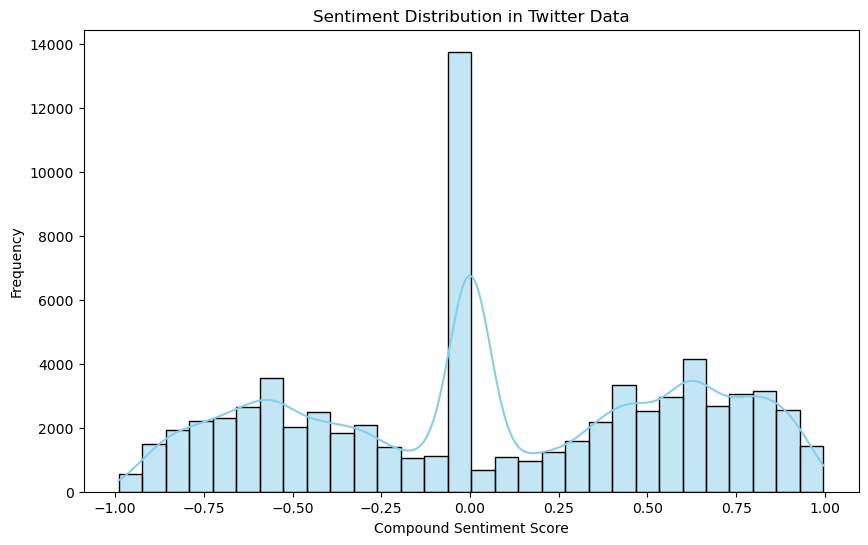

In [12]:
# Visualize sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['compound'], bins=30, kde=True, color='skyblue')
plt.title('Sentiment Distribution in Twitter Data')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.show()

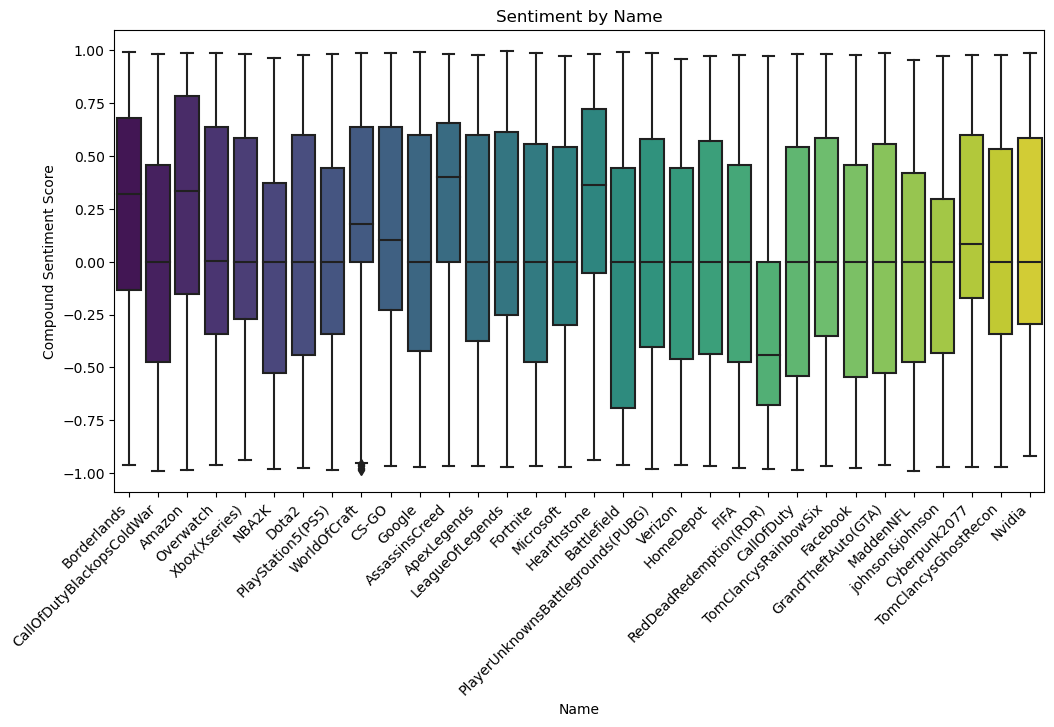

In [15]:
# Visualize sentiment by other relevant variables (e.g., 'user', 'brand', 'topic', etc.)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Name', y='compound', data=df, palette='viridis')
plt.title('Sentiment by Name')
plt.xlabel('Name')
plt.ylabel('Compound Sentiment Score')
plt.xticks(rotation=45, ha='right')
plt.show()